# Dense Neural Network Versjon 3.0

Denne gangen tar jeg inn 5 punker. Et nærme vindparken, og 4 punkter i en firkant rundt vindparken. Tanken er at informasjonen om være fra de nærliggende punktene i aromemodellen vil være bedre enn kun nærmeste punkt.

#### Importering av biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Innlasting av datasett

In [2]:
# TEK (1. Spetember til 18. Desember)
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()

# TEK (delayed 2 hours)
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)
    #df_tek_delayed.info()

# AROME Værdata (1. Spetember til 18. Desember)
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)
    #df_arome.info()

#### Samling av datasett

In [3]:
# Legger inn den forsinkede produksjonen som del av datasettet arome
df_arome['production_delayed_2_hours'] = df_tek_delayed['YVIK-YtreVikna1-Sum-produksjon']

In [5]:
df = pd.concat([
                
                df_arome['/arome_airtemp_6495_1081'],
                df_arome['/arome_airpress_6495_1081'], 
                df_arome['/arome_winddir_6495_1081'],
                df_arome['/arome_windvel_6495_1081'],
                
                df_arome['/arome_airtemp_6495_1096'],
                df_arome['/arome_airpress_6495_1096'], 
                df_arome['/arome_winddir_6495_1096'],
                df_arome['/arome_windvel_6495_1096'],
            
                df_arome['/arome_airtemp_6491_1087'],
                df_arome['/arome_airpress_6491_1087'], 
                df_arome['/arome_winddir_6491_1087'],
                df_arome['/arome_windvel_6491_1087'],
                
                df_arome['/arome_airtemp_6486_1082'],
                df_arome['/arome_airpress_6486_1082'], 
                df_arome['/arome_winddir_6486_1082'],
                df_arome['/arome_windvel_6486_1082'],
                
                df_arome['/arome_airtemp_6486_1093'],
                df_arome['/arome_airpress_6486_1093'], 
                df_arome['/arome_winddir_6486_1093'],
                df_arome['/arome_windvel_6486_1093'],
    
                df_arome['production_delayed_2_hours'],
                               
                df_tek['YVIK-YtreVikna1-Sum-produksjon']
    
               ],
    
               axis = 1)

In [6]:
df.head()

,/arome_airtemp_6495_1081,/arome_airpress_6495_1081,/arome_winddir_6495_1081,/arome_windvel_6495_1081,/arome_airtemp_6495_1096,/arome_airpress_6495_1096,/arome_winddir_6495_1096,/arome_windvel_6495_1096,/arome_airtemp_6491_1087,/arome_airpress_6491_1087,...,/arome_airtemp_6486_1082,/arome_airpress_6486_1082,/arome_winddir_6486_1082,/arome_windvel_6486_1082,/arome_airtemp_6486_1093,/arome_airpress_6486_1093,/arome_winddir_6486_1093,/arome_windvel_6486_1093,production_delayed_2_hours,YVIK-YtreVikna1-Sum-produksjon
0,11.60366,1008.76690,61.073106,2.742030,10.26430,1008.38190,29.830907,1.908252,9.33022,1004.84190,...,10.05776,1006.25690,69.174579,2.394239,9.99966,1006.99190,71.704773,1.345890,NaN,1.806583
1,11.56582,1008.96500,82.675463,2.908815,10.67080,1008.54500,45.540061,1.983691,9.78360,1005.00000,...,10.22256,1006.43500,72.975386,2.165520,10.39297,1007.21000,75.288555,1.771776,NaN,1.804100
2,11.46353,1009.08375,277.104771,2.725044,10.80630,1008.63375,65.806289,1.712978,9.93423,1005.10375,...,10.24722,1006.51375,78.588473,2.301872,10.43520,1007.24375,77.689848,1.352903,1.806583,1.992983
3,10.91860,1009.10440,303.729117,2.265309,10.69106,1008.64940,89.144674,2.221644,10.30680,1005.12440,...,10.18618,1006.51940,275.384765,2.295001,10.24917,1007.23440,84.743487,1.497224,1.804100,2.244483
4,10.76480,1009.44440,308.363350,2.863504,10.99673,1008.95940,308.525511,3.360517,10.62660,1005.48440,...,10.47964,1006.90440,305.229910,2.906496,10.18960,1007.57940,298.417648,1.474148,1.992983,6.783783


#### Vaske sammenstilte data

In [10]:
cleaned_dataframe = df.dropna()

In [11]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6495_1081', '/arome_airpress_6495_1081',
       '/arome_winddir_6495_1081', '/arome_windvel_6495_1081',
       '/arome_airtemp_6495_1096', '/arome_airpress_6495_1096',
       '/arome_winddir_6495_1096', '/arome_windvel_6495_1096',
       '/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       '/arome_airtemp_6486_1082', '/arome_airpress_6486_1082',
       '/arome_winddir_6486_1082', '/arome_windvel_6486_1082',
       '/arome_airtemp_6486_1093', '/arome_airpress_6486_1093',
       '/arome_winddir_6486_1093', '/arome_windvel_6486_1093',
       'production_delayed_2_hours', 'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [9]:
#cleaned_dataframe.count()

#### Dele datasett i et X- og Y-datasett

In [12]:
x = cleaned_dataframe[['/arome_airtemp_6495_1081', '/arome_airpress_6495_1081',
       '/arome_winddir_6495_1081', '/arome_windvel_6495_1081',
       '/arome_airtemp_6495_1096', '/arome_airpress_6495_1096',
       '/arome_winddir_6495_1096', '/arome_windvel_6495_1096',
       '/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       '/arome_airtemp_6486_1082', '/arome_airpress_6486_1082',
       '/arome_winddir_6486_1082', '/arome_windvel_6486_1082',
       '/arome_airtemp_6486_1093', '/arome_airpress_6486_1093',
       '/arome_winddir_6486_1093', '/arome_windvel_6486_1093',
       'production_delayed_2_hours']]
y = cleaned_dataframe['YVIK-YtreVikna1-Sum-produksjon']

#### Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

#### Skalere data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [81]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [82]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [83]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

## Lage modellen og trene modellen ( TensorFlow )

In [20]:
import tensorflow as tf

#### Lage feature columns

In [21]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6495_1081', '/arome_airpress_6495_1081',
       '/arome_winddir_6495_1081', '/arome_windvel_6495_1081',
       '/arome_airtemp_6495_1096', '/arome_airpress_6495_1096',
       '/arome_winddir_6495_1096', '/arome_windvel_6495_1096',
       '/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       '/arome_airtemp_6486_1082', '/arome_airpress_6486_1082',
       '/arome_winddir_6486_1082', '/arome_windvel_6486_1082',
       '/arome_airtemp_6486_1093', '/arome_airpress_6486_1093',
       '/arome_winddir_6486_1093', '/arome_windvel_6486_1093',
       'production_delayed_2_hours', 'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [84]:
airtemp_1 = tf.feature_column.numeric_column('/arome_airtemp_6495_1081')
airpress_1 = tf.feature_column.numeric_column('/arome_airpress_6495_1081')
winddir_1 = tf.feature_column.numeric_column('/arome_winddir_6495_1081')
windvel_1 = tf.feature_column.numeric_column('/arome_windvel_6495_1081')

airtemp_2 = tf.feature_column.numeric_column('/arome_airtemp_6495_1096')
airpress_2 = tf.feature_column.numeric_column('/arome_airpress_6495_1096')
winddir_2 = tf.feature_column.numeric_column('/arome_winddir_6495_1096')
windvel_2 = tf.feature_column.numeric_column('/arome_windvel_6495_1096')

airtemp_3 = tf.feature_column.numeric_column('/arome_airtemp_6491_1087')
airpress_3 = tf.feature_column.numeric_column('/arome_airpress_6491_1087')
winddir_3 = tf.feature_column.numeric_column('/arome_winddir_6491_1087')
windvel_3 = tf.feature_column.numeric_column('/arome_windvel_6491_1087')

airtemp_4 = tf.feature_column.numeric_column('/arome_airtemp_6486_1082')
airpress_4 = tf.feature_column.numeric_column('/arome_airpress_6486_1082')
winddir_4 = tf.feature_column.numeric_column('/arome_winddir_6486_1082')
windvel_4 = tf.feature_column.numeric_column('/arome_windvel_6486_1082')

airtemp_5 = tf.feature_column.numeric_column('/arome_airtemp_6486_1093')
airpress_5 = tf.feature_column.numeric_column('/arome_airpress_6486_1093')
winddir_5 = tf.feature_column.numeric_column('/arome_winddir_6486_1093')
windvel_5 = tf.feature_column.numeric_column('/arome_windvel_6486_1093')

prev_prod = tf.feature_column.numeric_column('production_delayed_2_hours')

In [85]:
feat_cols = [airtemp_1,airpress_1,winddir_1,windvel_1,
             airtemp_2,airpress_2,winddir_2,windvel_2,
             airtemp_3,airpress_3,winddir_3,windvel_3,
             airtemp_4,airpress_4,winddir_4,windvel_4,
             airtemp_5,airpress_5,winddir_5,windvel_5,
             prev_prod]

 #### Input function for the estimator object.

In [86]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=2000,
                                            shuffle=True)

#### Lage estimatormodellen. Velger her DNN-Regressor (Dense Neural Network Regressor)

In [97]:
model = tf.estimator.DNNRegressor(hidden_units=[7], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_summary_steps': 100, '_session_config': None, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\chris\\AppData\\Local\\Temp\\tmp4yk_u9ag', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1}


#### Trene modellen

In [98]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\chris\AppData\Local\Temp\tmp4yk_u9ag\model.ckpt.
INFO:tensorflow:loss = 6380.63, step = 1
INFO:tensorflow:global_step/sec: 198.862
INFO:tensorflow:loss = 1081.36, step = 101 (0.510 sec)
INFO:tensorflow:global_step/sec: 222.138
INFO:tensorflow:loss = 794.095, step = 201 (0.447 sec)
INFO:tensorflow:global_step/sec: 209.666
INFO:tensorflow:loss = 598.033, step = 301 (0.478 sec)
INFO:tensorflow:global_step/sec: 279.285
INFO:tensorflow:loss = 626.426, step = 401 (0.357 sec)
INFO:tensorflow:global_step/sec: 208.07
INFO:tensorflow:loss = 350.142, step = 501 (0.482 sec)
INFO:tensorflow:global_step/sec: 210.447
INFO:tensorflow:loss = 353.247, step = 601 (0.475 sec)
INFO:tensorflow:global_step/sec: 189.401
INFO:tensorflow:loss = 303.085, step = 701 (0.531 sec)
INFO:tensorflow:global_step/sec: 262.443
INFO:tensorflow:loss = 685.588, step = 801 (0.374 sec)
INFO:tensorflow:global_step/sec: 364.195
INF

INFO:tensorflow:global_step/sec: 433.954
INFO:tensorflow:loss = 286.326, step = 8401 (0.230 sec)
INFO:tensorflow:global_step/sec: 253.517
INFO:tensorflow:loss = 141.806, step = 8501 (0.397 sec)
INFO:tensorflow:global_step/sec: 199.549
INFO:tensorflow:loss = 113.25, step = 8601 (0.498 sec)
INFO:tensorflow:global_step/sec: 234.091
INFO:tensorflow:loss = 261.876, step = 8701 (0.431 sec)
INFO:tensorflow:global_step/sec: 207.706
INFO:tensorflow:loss = 60.9395, step = 8801 (0.481 sec)
INFO:tensorflow:global_step/sec: 224.902
INFO:tensorflow:loss = 592.404, step = 8901 (0.444 sec)
INFO:tensorflow:global_step/sec: 162.926
INFO:tensorflow:loss = 138.05, step = 9001 (0.615 sec)
INFO:tensorflow:global_step/sec: 187.715
INFO:tensorflow:loss = 115.35, step = 9101 (0.533 sec)
INFO:tensorflow:global_step/sec: 184.691
INFO:tensorflow:loss = 215.668, step = 9201 (0.547 sec)
INFO:tensorflow:global_step/sec: 176.596
INFO:tensorflow:loss = 185.464, step = 9301 (0.563 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 310.17
INFO:tensorflow:loss = 165.26, step = 16801 (0.322 sec)
INFO:tensorflow:global_step/sec: 246.254
INFO:tensorflow:loss = 138.221, step = 16901 (0.413 sec)
INFO:tensorflow:global_step/sec: 195.379
INFO:tensorflow:loss = 168.548, step = 17001 (0.510 sec)
INFO:tensorflow:global_step/sec: 193.456
INFO:tensorflow:loss = 329.665, step = 17101 (0.514 sec)
INFO:tensorflow:global_step/sec: 197.885
INFO:tensorflow:loss = 230.449, step = 17201 (0.516 sec)
INFO:tensorflow:global_step/sec: 202.033
INFO:tensorflow:loss = 670.01, step = 17301 (0.488 sec)
INFO:tensorflow:global_step/sec: 190.384
INFO:tensorflow:loss = 56.5108, step = 17401 (0.526 sec)
INFO:tensorflow:global_step/sec: 170.912
INFO:tensorflow:loss = 227.942, step = 17501 (0.586 sec)
INFO:tensorflow:global_step/sec: 184.526
INFO:tensorflow:loss = 232.158, step = 17601 (0.537 sec)
INFO:tensorflow:global_step/sec: 201.292
INFO:tensorflow:loss = 163.097, step = 17701 (0.496 sec)
INFO:tensorflow:global_

#### Lage en prediksjonsfunksjon og benytte .predict metoden på estimatormodellen for å lage en liste med prediksjoner på testdata.

In [100]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [101]:
pred_gen = model.predict(predict_input_func)

In [102]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from C:\Users\chris\AppData\Local\Temp\tmp4yk_u9ag\model.ckpt-20000


In [103]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

## Evaluere modellen

In [99]:
from sklearn import metrics

In [104]:
# 20 000 treningsrunder [7]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.10211843038
Mean Squared Error: 			 18.5526892285
Root Mean Squared Error: 		 4.30728327702


In [96]:
# 20 000 treningsrunder [8,8,8,8]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.0841157826
Mean Squared Error: 			 18.7248167155
Root Mean Squared Error: 		 4.32721812664


In [79]:
# 1 000 000 treningsrunder [10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.21919179646
Mean Squared Error: 			 19.4489742851
Root Mean Squared Error: 		 4.41009912418


In [70]:
# 1 000 000 treningsrunder [10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.26042382338
Mean Squared Error: 			 19.9741803049
Root Mean Squared Error: 		 4.46924829305


In [61]:
# 1 000 000 treningsrunder [10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.26398147493
Mean Squared Error: 			 19.7364847472
Root Mean Squared Error: 		 4.44257636368


In [50]:
# 1 000 000 treningsrunder [10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.62007318095
Mean Squared Error: 			 28.2173635138
Root Mean Squared Error: 		 5.31200183676


In [32]:
# 1000 treningsrunder [21,25,25,25]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.30531776743
Mean Squared Error: 			 19.9553798739
Root Mean Squared Error: 		 4.46714448769


In [41]:
# 100 000 treningsrunder [21,50,50,50,50,30]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.42716064108
Mean Squared Error: 			 24.7185742243
Root Mean Squared Error: 		 4.97177777302


#### Visualisere funn

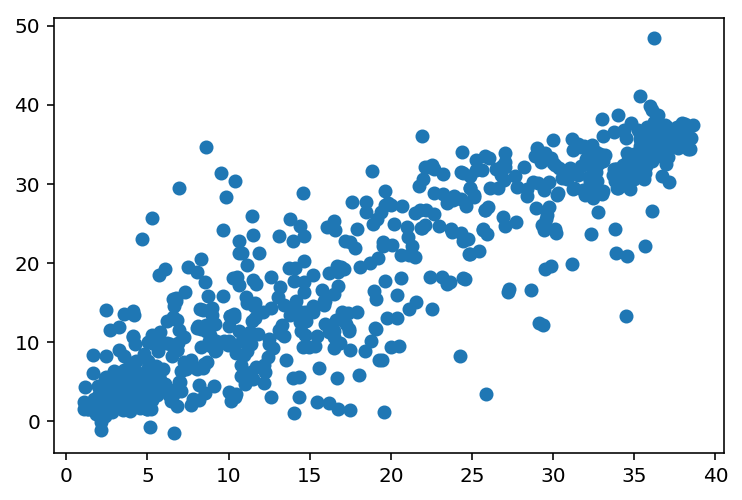

In [51]:
# Burde følge en rett linje

plt.scatter(y_test,final_preds)

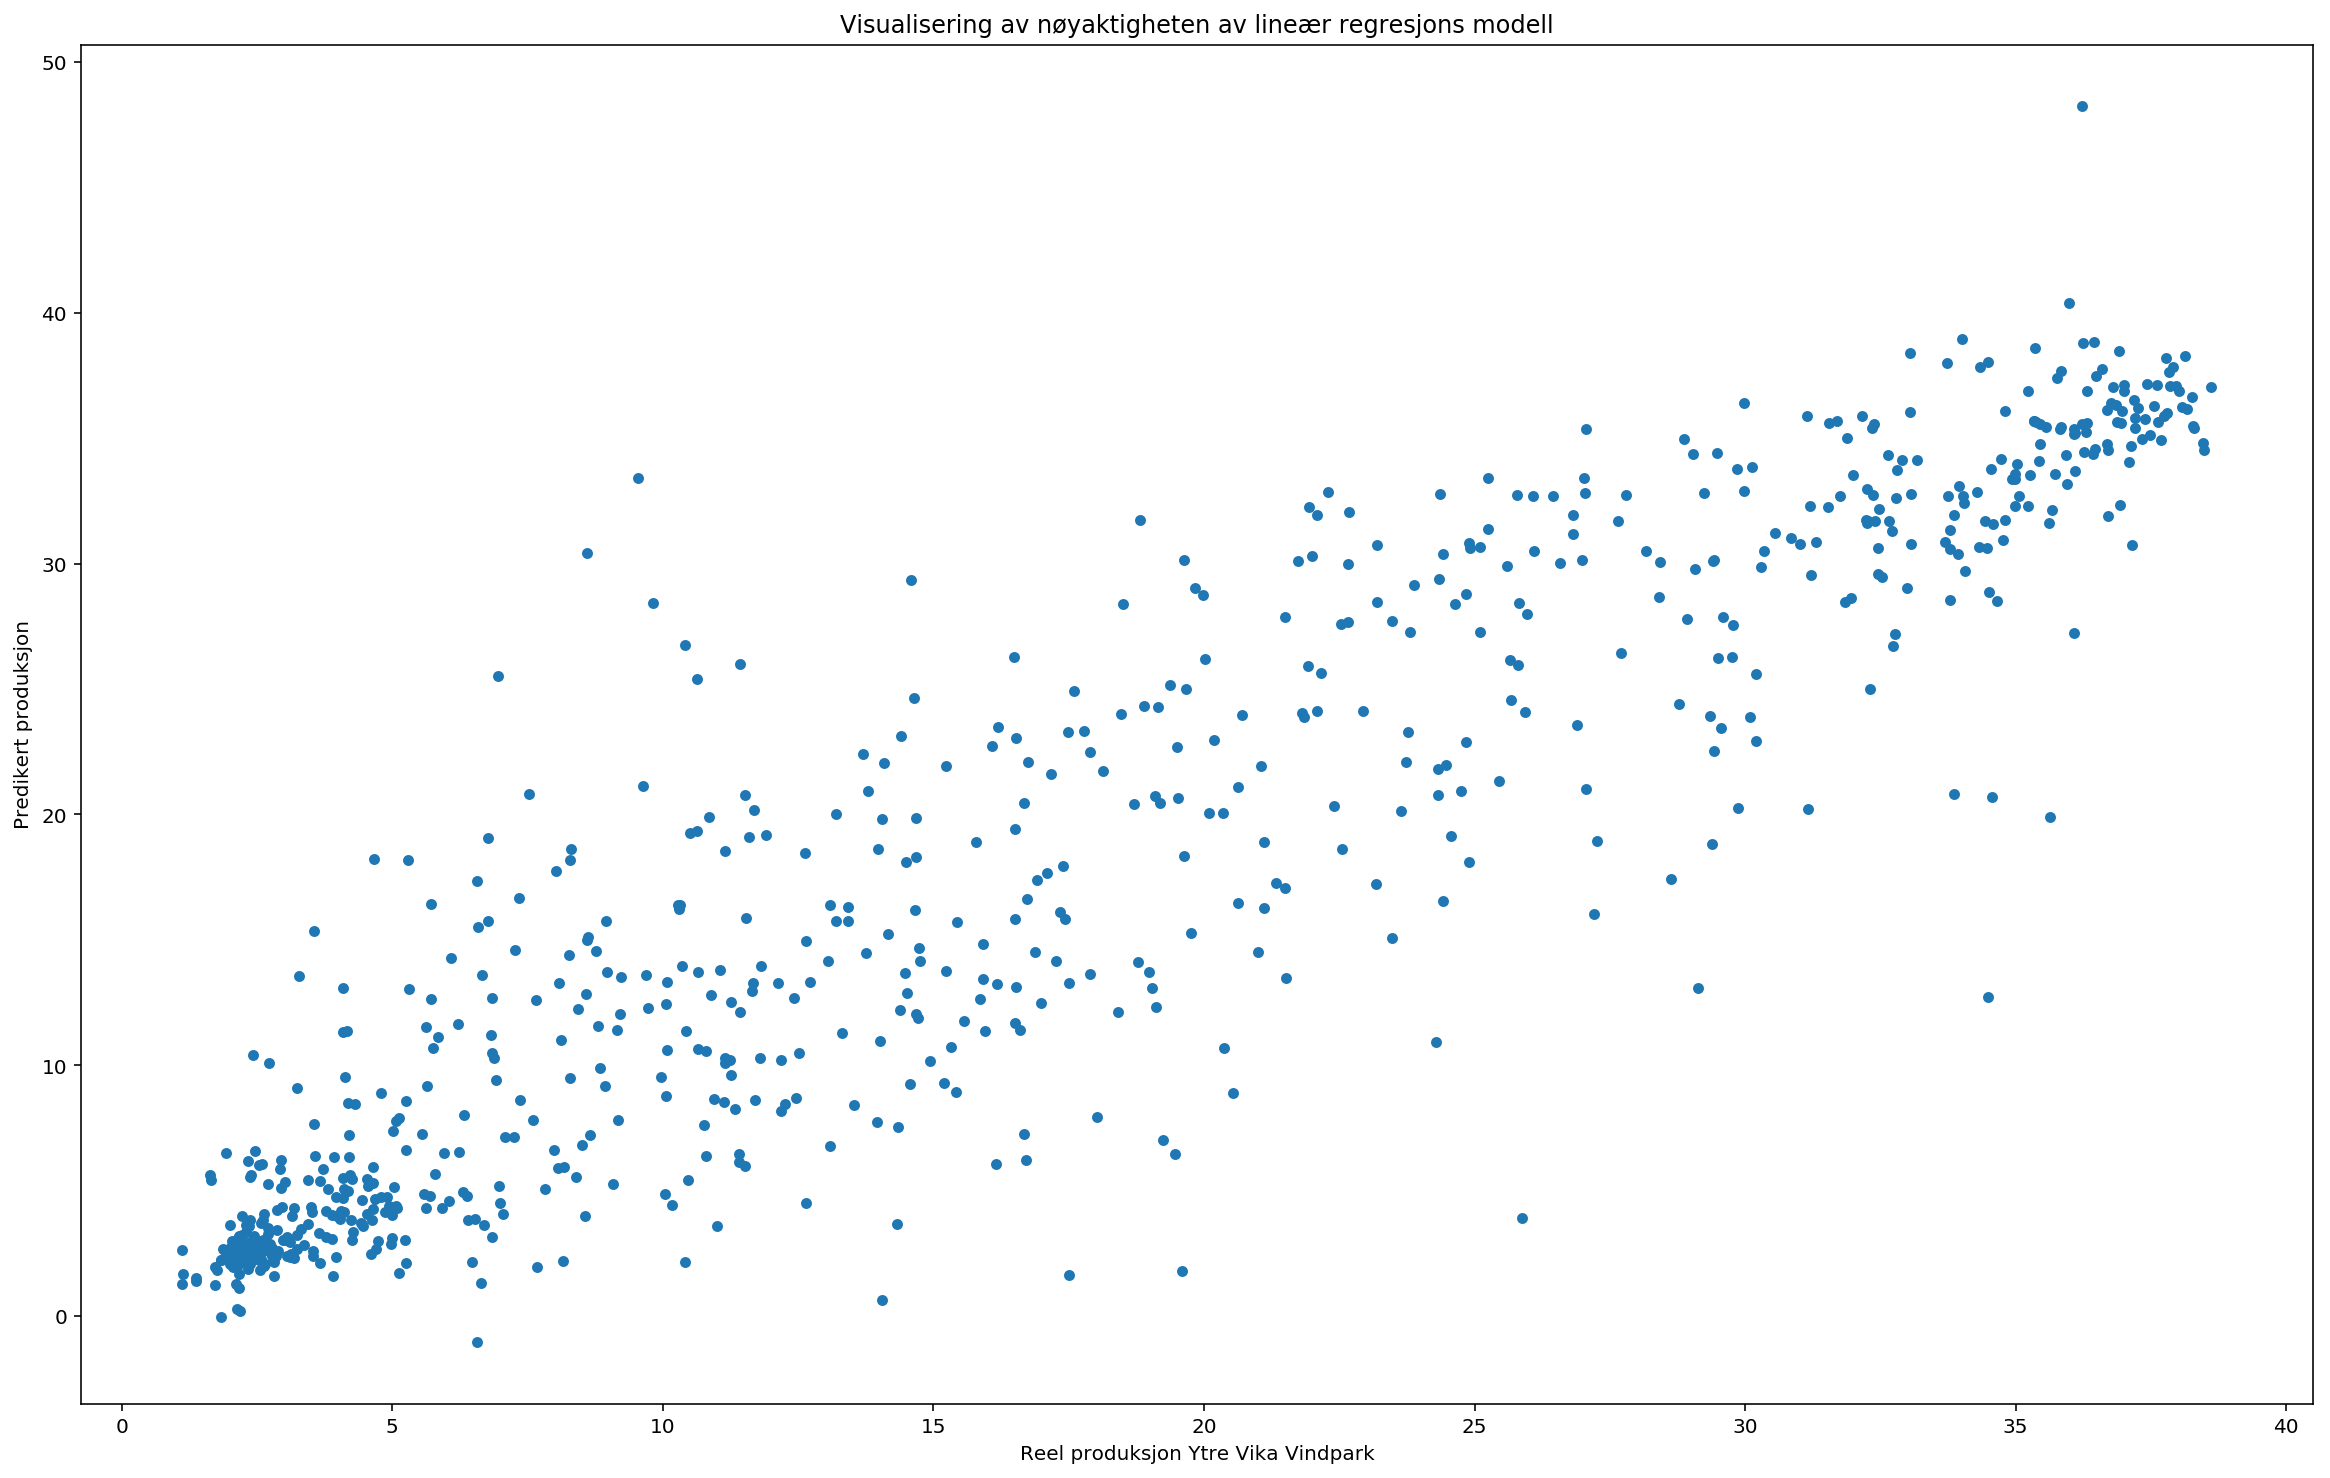

In [43]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

In [105]:
cleaned_dataframe.to_csv('cleaned_data.csv', sep=',')

In [106]:
cleaned_dataframe.to_csv('cleaned_data_semicolon_separator.csv', sep=';')